In [153]:
# 
import xarray
import rioxarray
import matplotlib.pyplot as plt
import numpy as np
from ease_grid import EASE2_grid

v1_path = r"../data\raw\AMSRU_Mland_2017001A.tif"


In [192]:
# Data in easev2 for comparison
v2_path = r"../data\raw\ka_36ghz\Ascending\GW1AM2_20170101_01D_EQMA_L3SGT36LA2220220_corrected.h5"
v2_data = xarray.open_dataset(v2_path)

# Apply the v2 data scaling factors:
for dvar in v2_data.data_vars:
    v2_data[dvar] *= v2_data[dvar].attrs["SCALE FACTOR"]

In [147]:
# # Create a empty xarray with tha lat-lon values of the EASEv2 grid
# egrid = EASE2_grid(25000)
# easegrid_array = xarray.DataArray(
#     data=np.ones(shape=(egrid.shape)),
#     coords={
#         "lat" : egrid.latdim,
#         "lon" : egrid.londim
#     }
# )
# easegrid_array

In [155]:
v1_data = rioxarray.open_rasterio(v1_path, masked=True)
print(v1_data.rio.crs)

# The default reader says that the CRS is EPSG_6933 ... lets check that.
print(v1_data.x.values[0], v1_data.y.values[0])

# According witht he EASE grid data, this point must be -17334193.54, 7344784.83


EPSG:6933
-17321659.775000002 7332251.062494965


In [156]:
# # In order to compare, we need to get the projected x,y dimensions in the EASEv2 grid
# from pyproj import Proj, transform, Transformer
# import numpy as np
# # Define the EPSG codes for the source (WGS84) and target (EPSG:6933) coordinate systems
# source_proj = Proj(init='epsg:4326', datum="WGS84")  # WGS84
# target_proj = Proj(init='EPSG:6933')  # EPSG:6933

# lon_matrix, lat_matrix = np.meshgrid(easegrid_array['lon'].values, easegrid_array['lat'].values)


# def latlon_to_xy (lat,lon):
#     x,y = transform(source_proj, target_proj, lon, lat)
#     return x, y


# y_coords, x_coords = latlon_to_xy(lat=lat_matrix.flatten(), lon=lon_matrix.flatten())

# y_coords = y_coords.reshape(lat_matrix.shape)
# x_coords = x_coords.reshape(lon_matrix.shape)

# easegrid_array["x"] = xarray.DataArray(
#     x_coords[0,:],
#     coords={'lon': easegrid_array['lon']},
#     dims=["lon"]
# )

# easegrid_array["y"] = xarray.DataArray(
#     y_coords[:,0],
#     coords={'lat': easegrid_array['lat']},
#     dims=["lat"]
# )

# easegrid_array

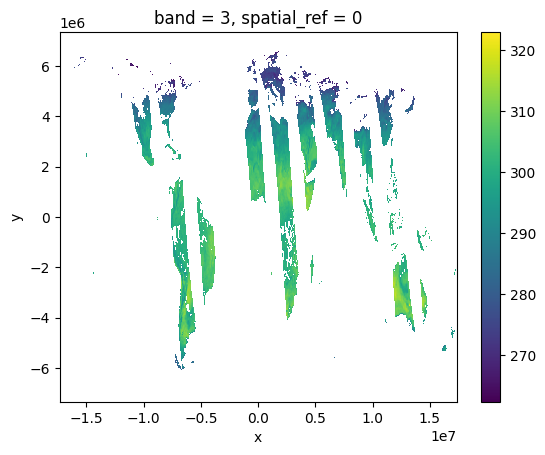

In [157]:
# Remove the missing values
v1_data.rio.write_crs("EPSG:3410")
rv1_data = v1_data.where(v1_data > 0)
rv1_data.sel(band=3).plot()

In [158]:
# Get the lon-lat coordinates of the v1 data
from pyproj import Transformer
transformer = Transformer.from_crs(3410,4326)

# in_proj = Proj(init='epsg:3410')
# out_proj = Proj(init='epsg:4326')

x_matrix, y_matrix = np.meshgrid(v1_data['x'].values, v1_data['y'].values)

def xy_to_latlon(x, y):
    lon, lat = transformer.transform(x, y)
    return lat, lon


lon_coords, lat_coords = xy_to_latlon(y=y_matrix.flatten(), x=x_matrix.flatten())

lat_coords = lat_coords.reshape(y_matrix.shape)
lon_coords = lon_coords.reshape(x_matrix.shape)

rv1_data["lon"] = xarray.DataArray(
    lon_coords[0,:],
    coords={'x': rv1_data['x']},
    dims=["x"]
)

rv1_data["lat"] = xarray.DataArray(
    lat_coords[:,0],
    coords={'y': rv1_data['y']},
    dims=["y"]
)

rv1_data

<xarray.DataArray (band: 7, y: 586, x: 1383)> Size: 23MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int32 28B 1 2 3 4 5 6 7
  * x            (x) float64 11kB -1.732e+07 -1.73e+07 ... 1.73e+07 1.732e+07
  * y            (y) float64 5kB 7.332e+06 7.307e+06 ... -7.307e+06 -7.332e+06
    spatial_ref  int32 4B 0
    lon          (x) float64 11kB -179.9 -179.6 -179.3 ... 179.3 179.6 179.9
    lat          (y) float64 5kB 85.31 83.34 81.83 ... -81.83 -83.34 -85.31
Attributes:
    AREA_OR_POINT:             Area
    TIFFTAG_DATETIME:          2021:03:16 22:21:13
    TIFFTAG_DOCUMENTNAME:      Y:/data/LPDR_v2/GeoTIFF/2017/AMSRU_Mland_20170...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    TIFFTAG_SOFTWARE:          IDL 8.7.2, Harris Geospatial Solutions, Inc.
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    scale_factor:              1.0
    add_offset:                0.0

(30.0, 60.0)

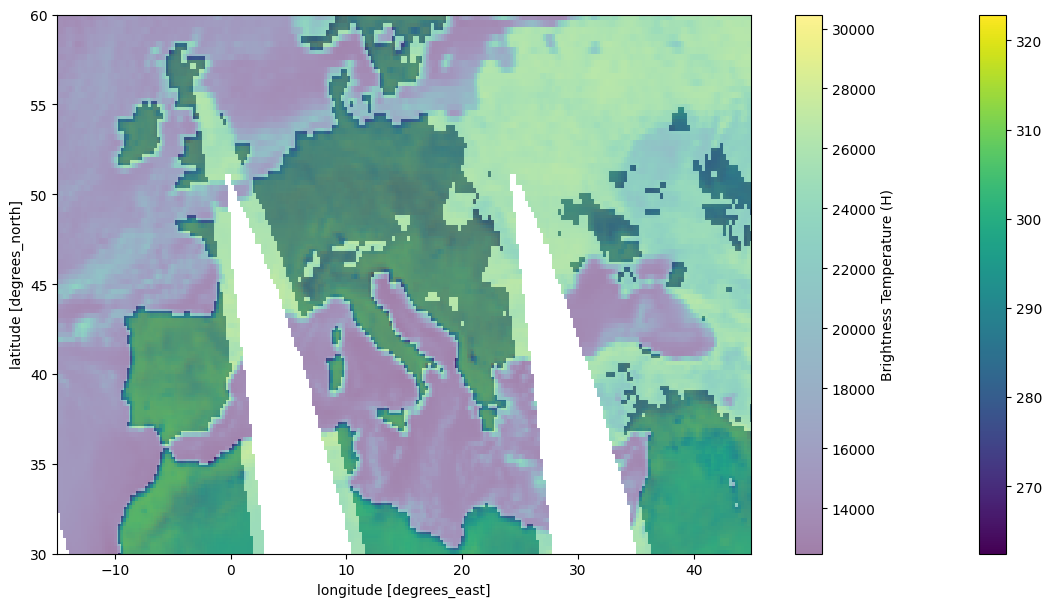

In [126]:
fig, ax = plt.subplots(1,1,figsize = (14,7))
rv1_data.sel(band=3).plot(x = "lon", y ="lat", ax = ax)

# bplot and compare with v2 data
v2_data["Brightness Temperature (H)"].plot(x = "lon", y ="lat", ax = ax, alpha = 0.5)

x_lims = (-15,45)
y_lims = (30,60)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])


In [159]:
# Scatterplot of the pixel locations:
# Extract the projected coordiantes as points. Do a meshgrid with lon and lat
lon1, lat1 = np.meshgrid(rv1_data.lon.values, rv1_data.lat.values)
lon1 = lon1.flatten()
lat1 = lat1.flatten()

# Do the same with the original V1 coordiantes
lon2, lat2 = np.meshgrid(v2_data.lon.values, v2_data.lat.values)
lon2 = lon2.flatten()
lat2 = lat2.flatten()


(0.0, 10.0)

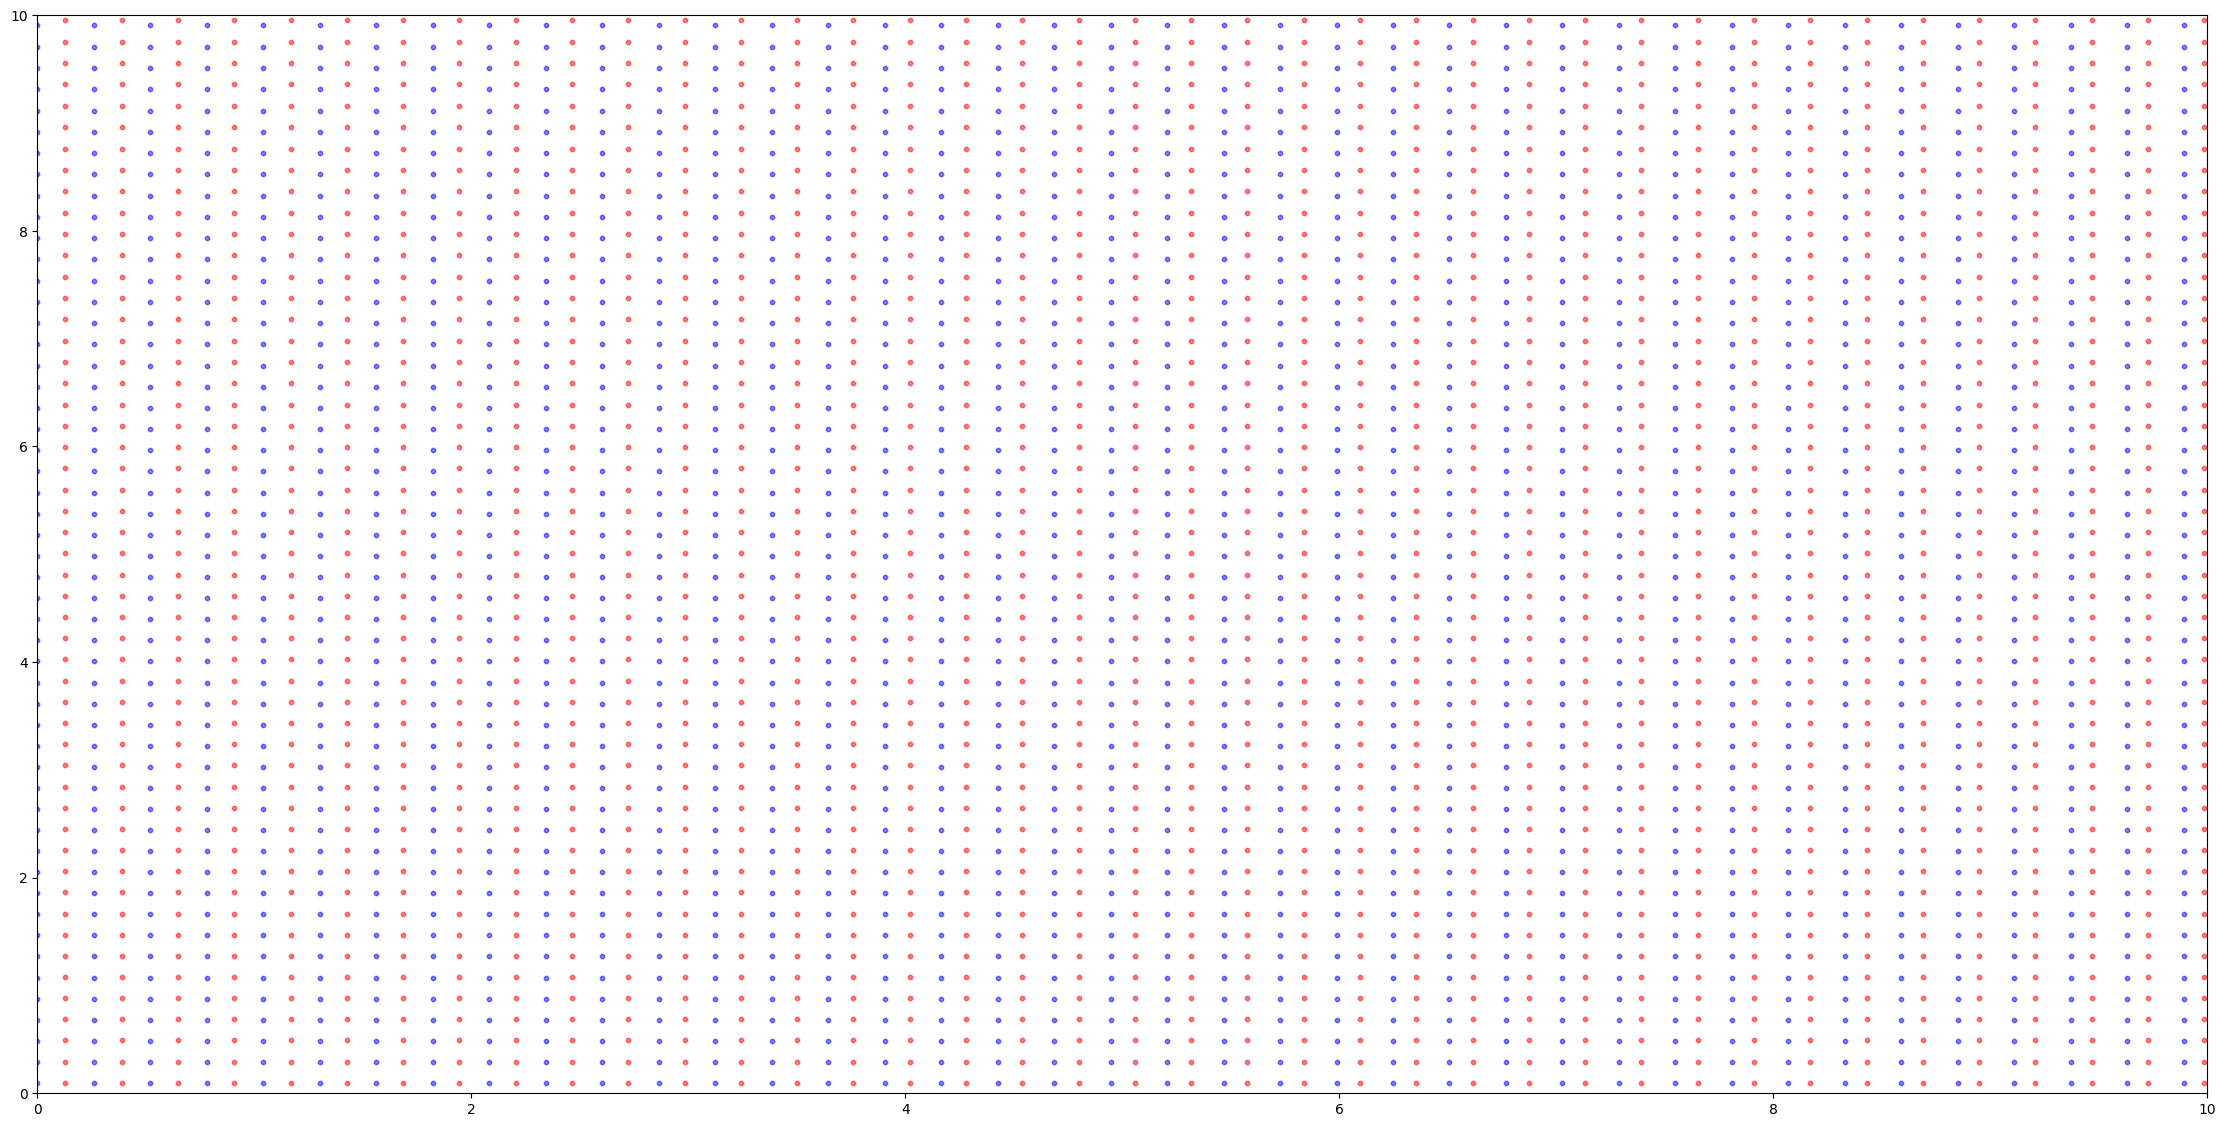

In [160]:
fig,ax = plt.subplots(1,1,figsize=(28,14))
ax.scatter(lon2,lat2,s=10, color="Red", alpha=0.5)

ax.scatter(lon1,lat1,s=10,color = "Blue", alpha=0.5)

# Plot zoom:
x_lims = (0,10)
y_lims = (0,10)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

They dont line up

In [161]:
# Try now reprojection from the original to the EASEv2 grid using pyptoj:

# The values we have are from the xy epsg:3410, not the 6933 (or EASEv2), lets tranlate them

# Get the lon-lat coordinates of the v1 data
from pyproj import Transformer
transformer = Transformer.from_crs(3410,6933)

v1x_matrix, v1y_matrix = np.meshgrid(v1_data['x'].values, v1_data['y'].values)

def v1_to_v2(x, y):
    x2, y2 = transformer.transform(x, y)
    return x2, y2


v2x_matrix, v2y_matrix = v1_to_v2(x = v1x_matrix.flatten(), y = v1y_matrix.flatten())


v2y_matrix = v2y_matrix.reshape(v1y_matrix.shape)
v2x_matrix = v2x_matrix.reshape(v1x_matrix.shape)

rv1_data["x"] = xarray.DataArray(
    v2x_matrix[0,:],
    coords={'x': rv1_data['x']},
    dims=["x"]
)

rv1_data["y"] = xarray.DataArray(
    v2y_matrix[:,0],
    coords={'y': rv1_data['y']},
    dims=["y"]
)


I tested this and the values are different

In [162]:
rv1_data

<xarray.DataArray (band: 7, y: 586, x: 1383)> Size: 23MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int32 28B 1 2 3 4 5 6 7
    spatial_ref  int32 4B 0
    lon          (x) float64 11kB -179.9 -179.6 -179.3 ... 179.3 179.6 179.9
    lat          (y) float64 5kB 85.31 83.34 81.83 ... -81.83 -83.34 -85.31
  * x            (x) float64 11kB -1.735e+07 -1.733e+07 ... 1.733e+07 1.735e+07
  * y            (y) float64 5kB 7.317e+06 7.292e+06 ... -7.292e+06 -7.317e+06
Attributes:
    AREA_OR_POINT:             Area
    TIFFTAG_DATETIME:          2021:03:16 22:21:13
    TIFFTAG_DOCUMENTNAME:      Y:/data/LPDR_v2/GeoTIFF/2017/AMSRU_Mland_20170...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    TIFFTAG_SOFTWARE:          IDL 8.7.2, Harris Geospatial Solutions, Inc.
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    scale_factor:              1.0
    add_offset:                0.0

The values of the projected coordinates are different, which is good (?)

In [174]:
v1_data.x, rv1_data.x

(<xarray.DataArray 'x' (x: 1383)> Size: 11kB
 array([-17321659.775   , -17296592.25    , -17271524.725   , ...,
         17271524.724996,  17296592.249996,  17321659.774996])
 Coordinates:
   * x            (x) float64 11kB -1.732e+07 -1.73e+07 ... 1.73e+07 1.732e+07
     spatial_ref  int32 4B 0,
 <xarray.DataArray 'x' (x: 1383)> Size: 11kB
 array([-17354972.17121 , -17329856.437243, -17304740.703276, ...,
         17304740.703272,  17329856.437239,  17354972.171206])
 Coordinates:
     spatial_ref  int32 4B 0
     lon          (x) float64 11kB -179.9 -179.6 -179.3 ... 179.3 179.6 179.9
   * x            (x) float64 11kB -1.735e+07 -1.733e+07 ... 1.733e+07 1.735e+07)

In [184]:
# resample into the final shape

from rasterio.enums import Resampling

# Remove lon and lat that we calculated for the other values
rv1_data_r = rv1_data.drop(["lat","lon"])

rv1_data_r = rv1_data_r.rio.reproject(
    dst_crs = rv1_data.rio.crs,
    shape = (584,1388),
    resampling=Resampling.bilinear
)
rv1_data_r.sizes


C:\Users\andre\AppData\Local\Temp\ipykernel_17832\3624157117.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  rv1_data_r = rv1_data.drop(["lat","lon"])


Frozen({'band': 7, 'y': 584, 'x': 1388})

In [190]:
# Re calculate the lat-lon for this projection:
transformer = Transformer.from_crs(6933,4326)

x_matrix, y_matrix = np.meshgrid(rv1_data_r['x'].values, rv1_data_r['y'].values)

def xy_to_latlon(x, y):
    lon, lat = transformer.transform(x, y)
    return lon, lat


lon_coords, lat_coords = xy_to_latlon(y=y_matrix.flatten(), x=x_matrix.flatten())

lat_coords = lat_coords.reshape(y_matrix.shape)
lon_coords = lon_coords.reshape(x_matrix.shape)

rv1_data_r["lon"] = xarray.DataArray(
    lon_coords[0,:],
    coords={'x': rv1_data_r['x']},
    dims=["x"]
)

rv1_data_r["lat"] = xarray.DataArray(
    lat_coords[:,0],
    coords={'y': rv1_data_r['y']},
    dims=["y"]
)

rv1_data

<xarray.DataArray (band: 7, y: 586, x: 1383)> Size: 23MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int32 28B 1 2 3 4 5 6 7
    spatial_ref  int32 4B 0
    lon          (x) float64 11kB -179.9 -179.6 -179.3 ... 179.3 179.6 179.9
    lat          (y) float64 5kB 85.31 83.34 81.83 ... -81.83 -83.34 -85.31
  * x            (x) float64 11kB -1.735e+07 -1.733e+07 ... 1.733e+07 1.735e+07
  * y            (y) float64 5kB 7.317e+06 7.292e+06 ... -7.292e+06 -7.317e+06
Attributes:
    AREA_OR_POINT:             Area
    TIFFTAG_DATETIME:          2021:03:16 22:21:13
    TIFFTAG_DOCUMENTNAME:      Y:/data/LPDR_v2/GeoTIFF/2017/AMSRU_Mland_20170...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    TIFFTAG_SOFTWARE:          IDL 8.7.2, Harris Geospatial Solutions, Inc.
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    scale_factor:              1.0
    add_offset:                0.0

(30.0, 60.0)

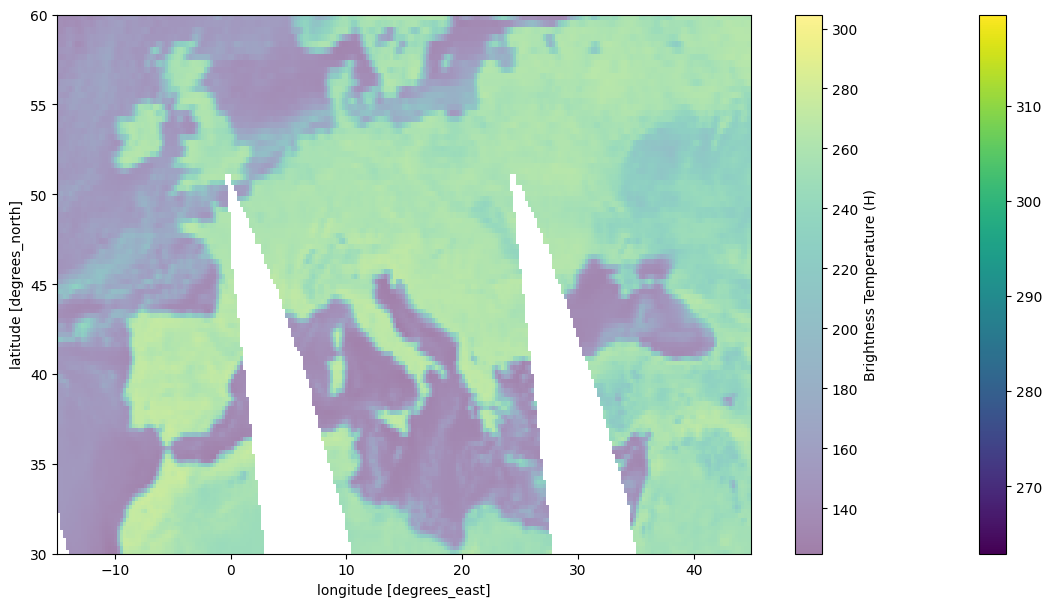

In [193]:
# Repeat the plots witht he new data:
fig, ax = plt.subplots(1,1,figsize = (14,7))
rv1_data_r.sel(band=3).plot(x = "lon", y ="lat", ax = ax)

# bplot and compare with v2 data
v2_data["Brightness Temperature (H)"].plot(x = "lon", y ="lat", ax = ax, alpha = 0.5)

x_lims = (-15,45)
y_lims = (30,60)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])


In [194]:
# check the pixel centers:
# Scatterplot of the pixel locations:
# Extract the projected coordiantes as points. Do a meshgrid with lon and lat
lon1, lat1 = np.meshgrid(rv1_data_r.lon.values, rv1_data_r.lat.values)
lon1 = lon1.flatten()
lat1 = lat1.flatten()

# Do the same with the original V1 coordiantes
lon2, lat2 = np.meshgrid(v2_data.lon.values, v2_data.lat.values)
lon2 = lon2.flatten()
lat2 = lat2.flatten()


(0.0, 10.0)

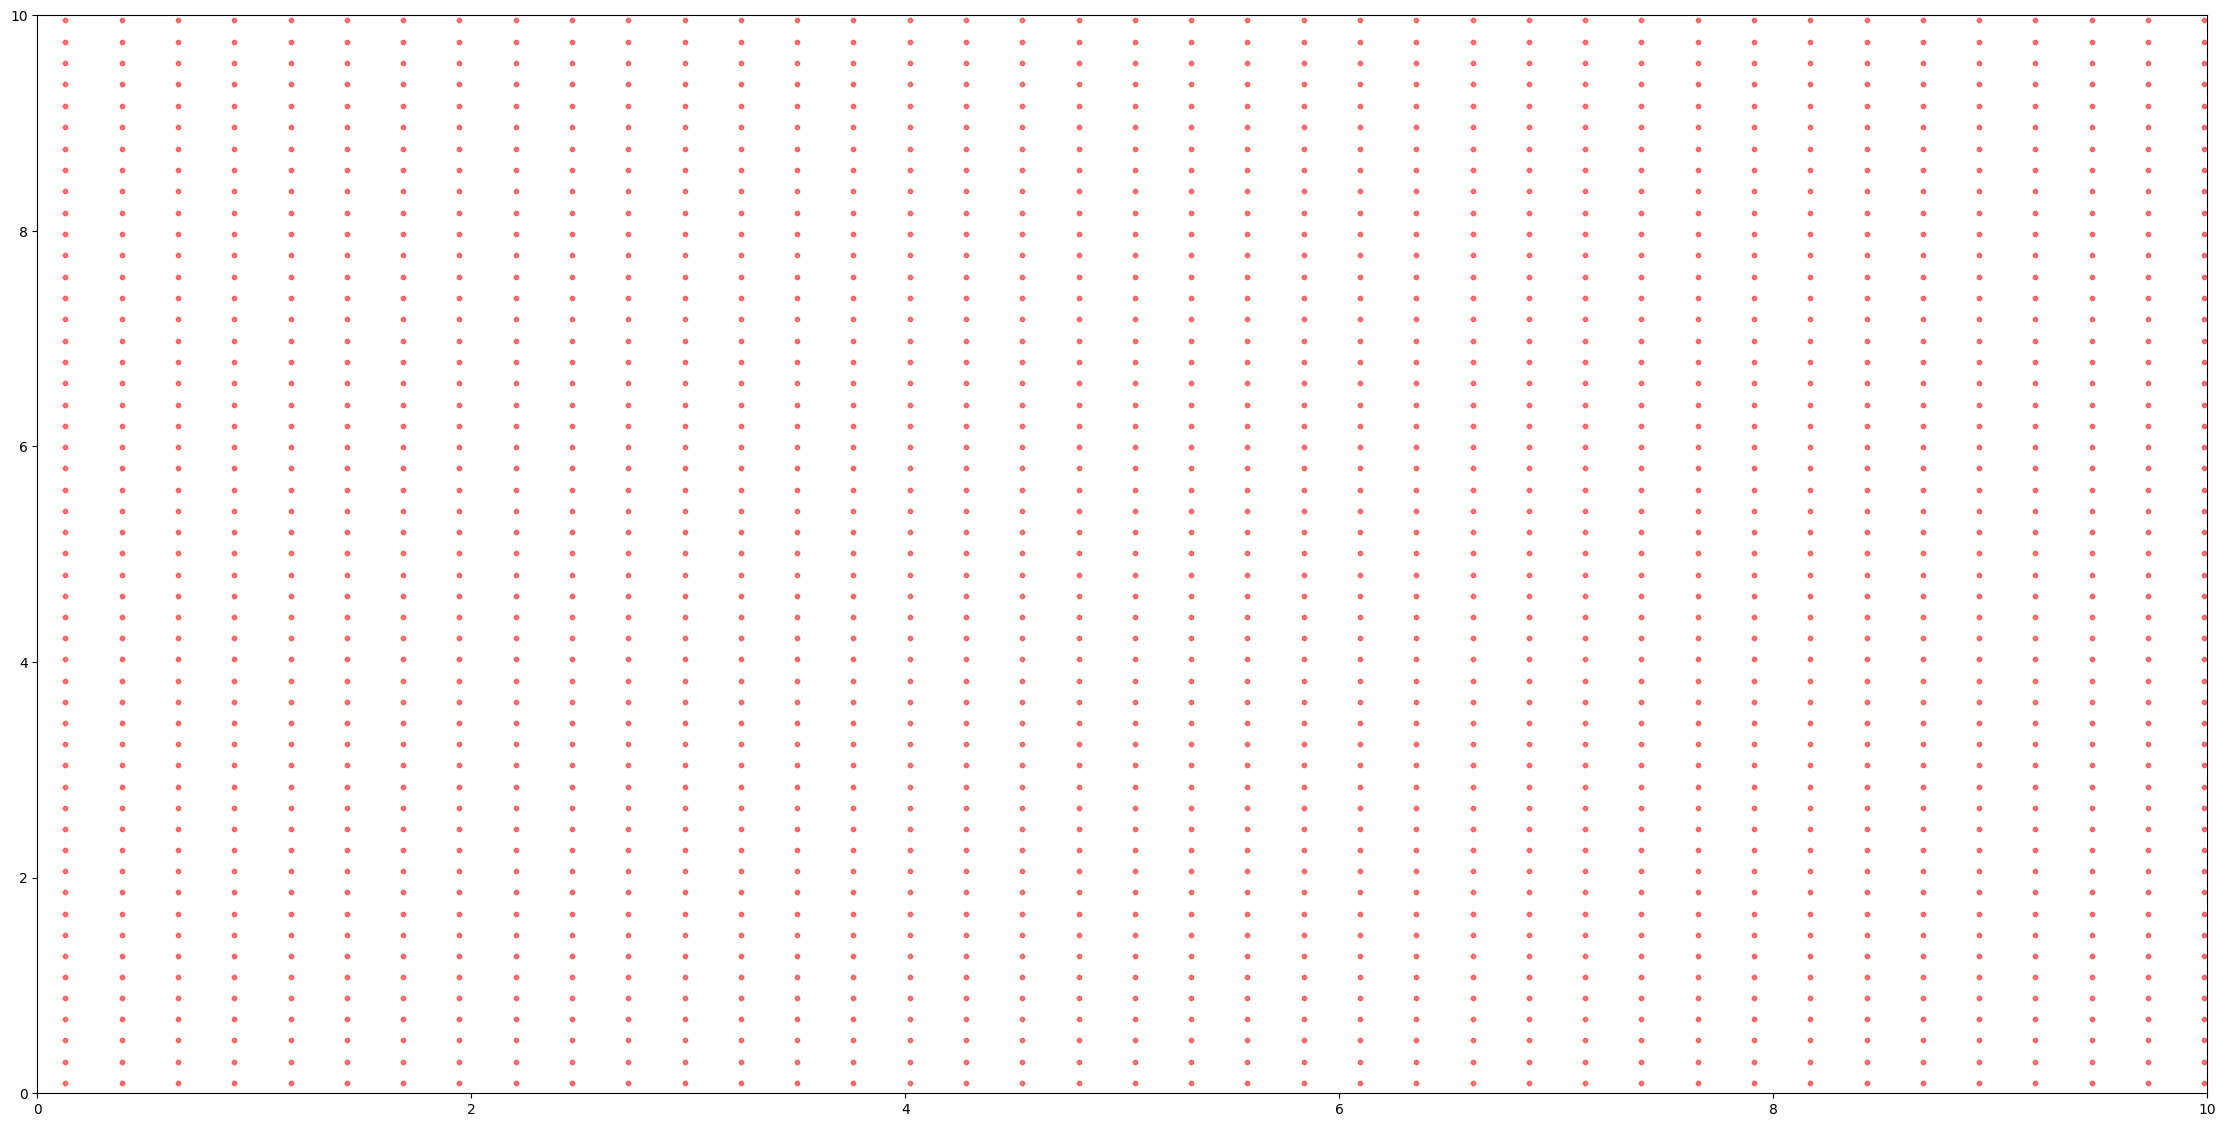

In [195]:
fig,ax = plt.subplots(1,1,figsize=(28,14))
ax.scatter(lon2,lat2,s=10, color="Red", alpha=0.5)

ax.scatter(lon1,lat1,s=10,color = "Blue", alpha=0.5)

# Plot zoom:
x_lims = (0,10)
y_lims = (0,10)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])